<a href="https://colab.research.google.com/github/dtoralg/TheValley_MDS/blob/main/%5B02%5D%20-%20Analisis_Cluster/%5B01%5D%20-%20Notebooks/E3_DBSCAN_MOONS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio de Clustering con DBSCAN: Dataset Moons

## Introducción
En este ejercicio exploraremos DBSCAN (Density-Based Spatial Clustering of Applications with Noise), un algoritmo de clustering basado en densidad que permite encontrar grupos de forma arbitraria y detectar outliers sin necesidad de especificar el número de clusters de antemano. A diferencia de algoritmos como K-Means, que suponen clusters de forma esférica, DBSCAN puede seguir la forma natural de los datos y separar clusters que presenten formas no lineales o complejas.

Este ejercicio te permitirá comprobar cómo ajustar los parámetros ϵ y minPts de DBSCAN impacta en los resultados y aprender a interpretar los clusters y puntos detectados como ruido.



## Objetivos del ejercicio
* Comprender el funcionamiento del algoritmo DBSCAN y el papel de sus parámetros clave.

* Aplicar DBSCAN sobre un conjunto de datos sintético con clusters no esféricos.

* Visualizar cómo cambian los clusters al variar ϵ y minPts.

* Identificar puntos considerados como outliers por DBSCAN.

* Reflexionar sobre las diferencias de DBSCAN frente a otros métodos de clustering.



## Descripción del dataset
En este ejercicio trabajaremos con el dataset sintético “moons” generado con la función make_moons de sklearn. Este dataset crea dos grupos de puntos en forma de lunas entrelazadas, presentando un escenario perfecto para ilustrar las limitaciones de K-Means y las ventajas de DBSCAN.

**Características del dataset:**

Contiene 300 muestras distribuidas en dos clusters en forma de media luna.

Incluye un pequeño nivel de ruido para simular datos reales.

Se presenta en un espacio bidimensional, ideal para la visualización.

Este dataset es ampliamente utilizado en machine learning para probar algoritmos de clustering en situaciones donde los clusters no siguen formas esféricas.



## Importar librerías necesarias


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN, KMeans

## Cargar y explorar el dataset Moons


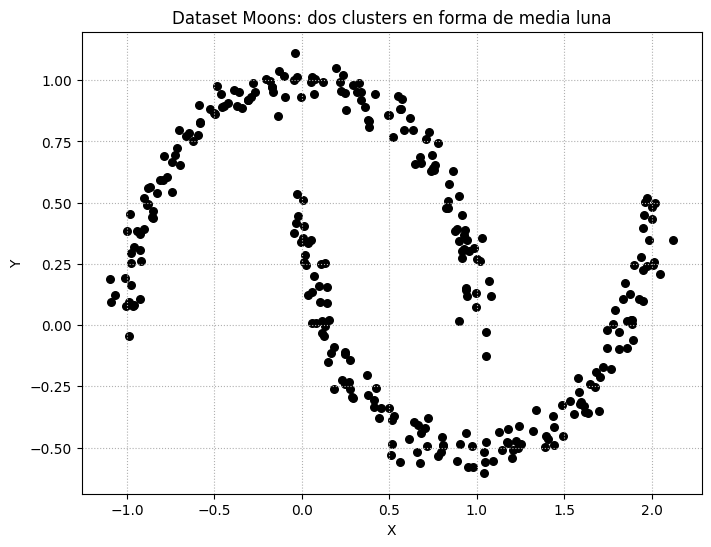

In [2]:
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='black', s=30)
plt.title('Dataset Moons: dos clusters en forma de media luna')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle=':')
plt.show()

## Aplicar y visualizar K-means

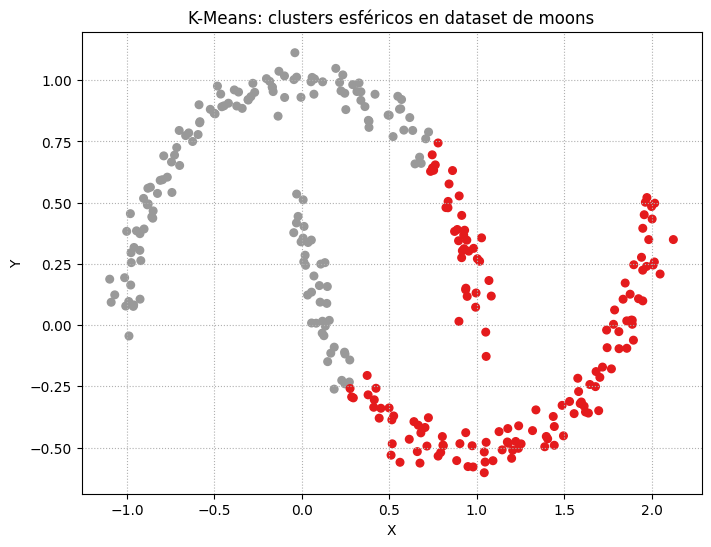

¿Qué observas en el resultado de K-Means? ¿Crees que refleja bien la estructura de los datos?


In [3]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='Set1', s=30)
plt.title('K-Means: clusters esféricos en dataset de moons')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle=':')
plt.show()

print("¿Qué observas en el resultado de K-Means? ¿Crees que refleja bien la estructura de los datos?")


## Aplicar y visualizar DBSCAN con diferentes eps

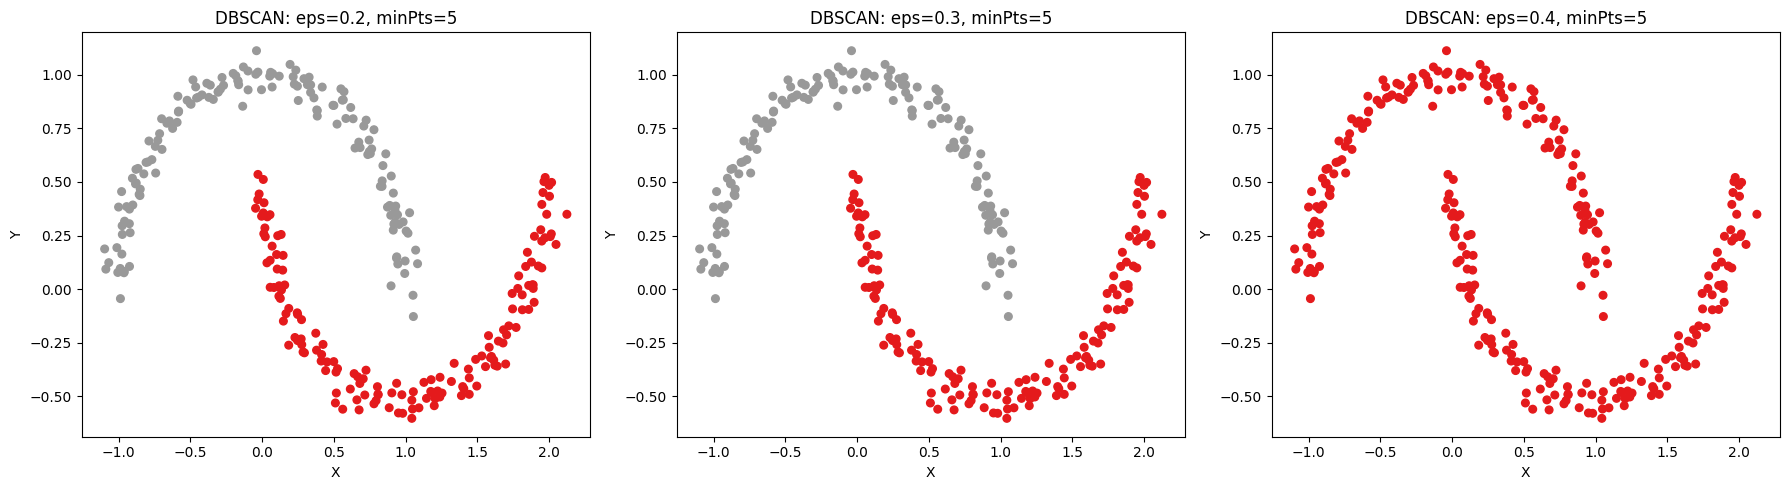

In [4]:
eps_values = [0.2, 0.3, 0.4]
min_samples = 5

plt.figure(figsize=(18, 5))

for i, eps in enumerate(eps_values, 1):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)

    plt.subplot(1, 3, i)
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1', s=30)
    plt.title(f'DBSCAN: eps={eps}, minPts={min_samples}')
    plt.xlabel('X')
    plt.ylabel('Y')

plt.tight_layout()
plt.show()


## Mostrar número de clusters y outliers para cada eps

In [5]:
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    print(f"Para eps={eps}: {n_clusters} clusters encontrados, {n_noise} puntos detectados como ruido.")

print("\n¿Qué relación observas entre el valor de eps y el número de clusters o outliers?")


Para eps=0.2: 2 clusters encontrados, 0 puntos detectados como ruido.
Para eps=0.3: 2 clusters encontrados, 0 puntos detectados como ruido.
Para eps=0.4: 1 clusters encontrados, 0 puntos detectados como ruido.

¿Qué relación observas entre el valor de eps y el número de clusters o outliers?


## Cálculo y gráfico de Silhouette Score

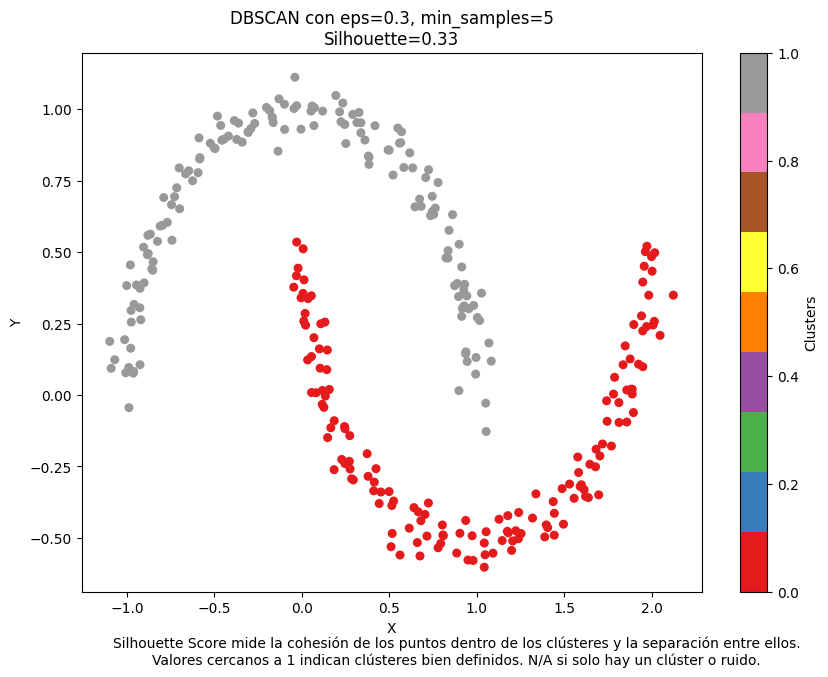

In [6]:
from sklearn.metrics import silhouette_score

# Parámetros fijos
eps = 0.3
min_samples = 5

# Crear modelo DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Ajustar y predecir los clusters
labels = dbscan.fit_predict(X)

# Filtrar los puntos etiquetados como ruido (-1)
mask = labels != -1
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Calcular el Silhouette Score si hay más de 1 clúster
silhouette = 'N/A'
if n_clusters > 1:
    silhouette = silhouette_score(X[mask], labels[mask])

# Crear el gráfico
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1', s=30)
plt.title(f'DBSCAN con eps={eps}, min_samples={min_samples}\nSilhouette={silhouette if silhouette == "N/A" else f"{silhouette:.2f}"}')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Clusters')

# Añadir una pequeña explicación educativa
plt.figtext(0.5, 0.01, "Silhouette Score mide la cohesión de los puntos dentro de los clústeres y la separación entre ellos.\n"
                        "Valores cercanos a 1 indican clústeres bien definidos. N/A si solo hay un clúster o ruido.",
            wrap=True, horizontalalignment='center', fontsize=10)

plt.show()


## Cálculo y gráfico de Davies-Bouldin Index

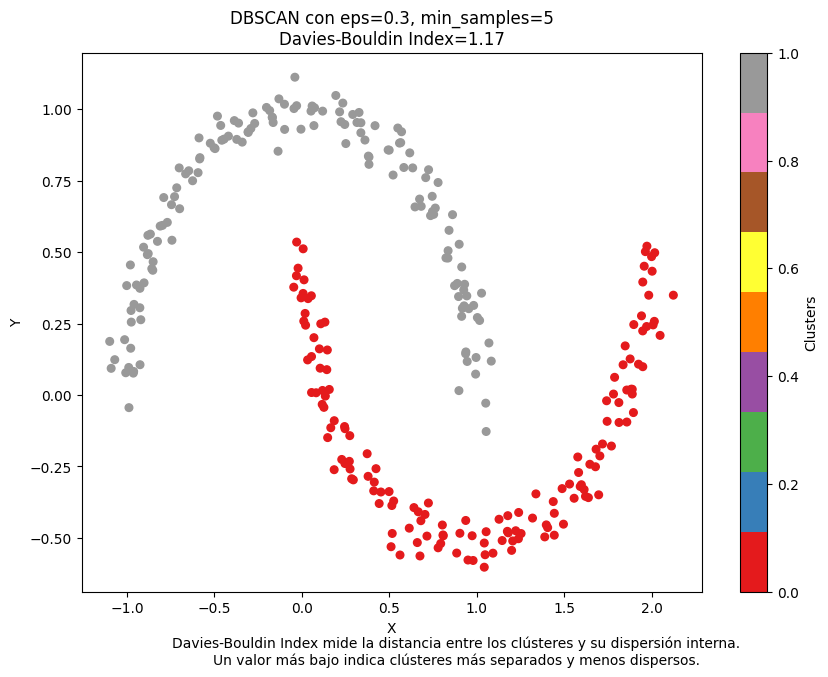

In [7]:
from sklearn.metrics import davies_bouldin_score

# Parámetros fijos
eps = 0.3
min_samples = 5

# Crear modelo DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Ajustar y predecir los clusters
labels = dbscan.fit_predict(X)

# Filtrar los puntos etiquetados como ruido (-1)
mask = labels != -1
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Calcular el Davies-Bouldin Index si hay más de 1 clúster
db_index = 'N/A'
if n_clusters > 1:
    db_index = davies_bouldin_score(X[mask], labels[mask])

# Crear el gráfico
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1', s=30)
plt.title(f'DBSCAN con eps={eps}, min_samples={min_samples}\nDavies-Bouldin Index={db_index if db_index == "N/A" else f"{db_index:.2f}"}')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Clusters')

# Añadir una pequeña explicación educativa
plt.figtext(0.5, 0.01, "Davies-Bouldin Index mide la distancia entre los clústeres y su dispersión interna.\n"
                        "Un valor más bajo indica clústeres más separados y menos dispersos.",
            wrap=True, horizontalalignment='center', fontsize=10)

plt.show()


## Ejercicio opcional – experimentar con min_samples

In [ ]:
## Ejercicio opcional

Cambia el parámetro `min_samples` (por ejemplo a 3 o 10) y observa cómo cambian los clusters detectados.

- ¿Qué sucede cuando min_samples es muy pequeño?
- ¿Y cuando es muy grande?


## Reflexión y preguntas para discusión grupal

- ¿Qué ventajas y limitaciones tiene cada método (K-Means, clustering jerárquico, DBSCAN)?
- ¿En qué escenarios preferirías DBSCAN frente a K-Means?
- ¿Cuándo es más útil un dendrograma?
- ¿Qué métodos son más robustos frente a outliers?

Comparte tus conclusiones con la clase.
